## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 4
#### Sidorczuk Nicolás Andrés

***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./TP4-EJ1-1.jpg" align="center" width="70%" /> 
<img src="./TP4-EJ1b.jpg" align="center" width="70%" /> 


   b) Corrobore su respuesta mediante la simulación computacional


In [1]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig
import scipy.io as sio
import Funciones as myf

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)


d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


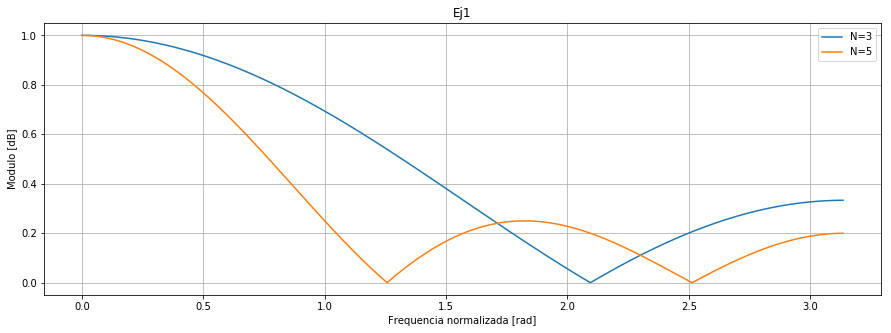

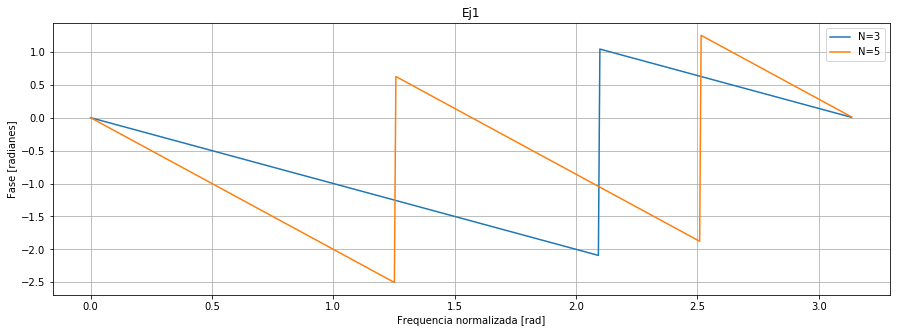

In [2]:
###################  N = 3 #######################
w1, h1 = sig.freqz(np.array([1, 1, 1]), 1)
h1 /= 3
###################  N = 5 #######################
w2, h2 = sig.freqz(np.array([1, 1, 1, 1, 1]), 1)
h2 /= 5

plt.figure(figsize=(15,5))
plt.plot(w1, abs(h1), label='N=3')
plt.plot(w2, abs(h2), label='N=5')
plt.title('Ej1')
plt.xlabel('Frequencia normalizada [rad]')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(w1, np.angle(h1), label='N=3')
plt.plot(w2, np.angle(h2), label='N=5')
plt.title('Ej1')
plt.xlabel('Frequencia normalizada [rad]')
plt.ylabel('Fase [radianes]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./TP4-EJ2.jpg" align="center" width="80%" /> 


   b) Corrobore su respuesta mediante simulación computacional


d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


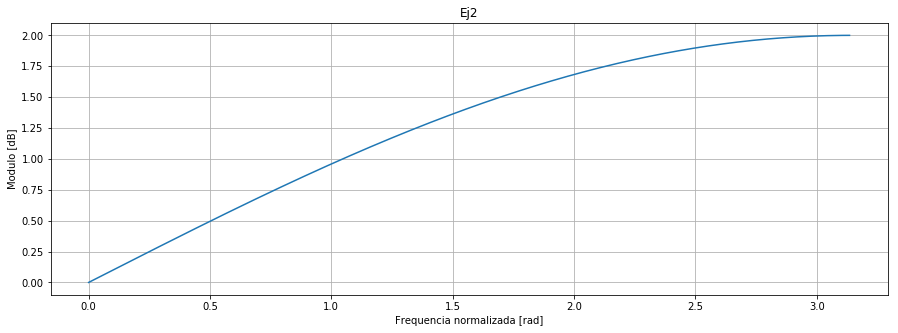

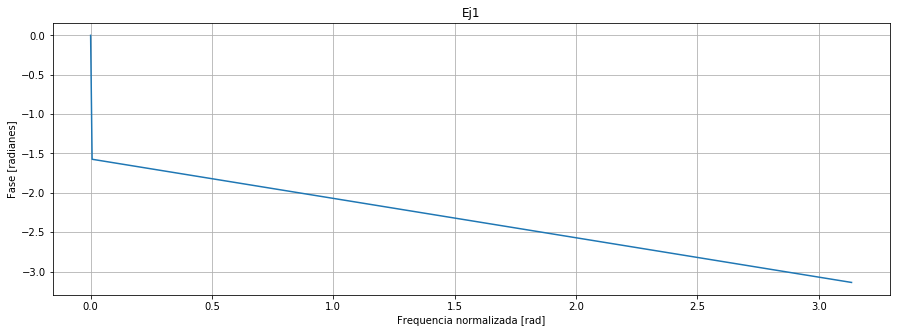

In [3]:
w, h = sig.freqz(np.array([-1, 1]), 1)
#ww = ww / np.pi

plt.figure(figsize=(15,5))
#plt.plot(w, 20 * np.log10(abs(h)))
plt.plot(w, abs(h))
plt.title('Ej2')
plt.xlabel('Frequencia normalizada [rad]')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(w, np.angle(h))
plt.title('Ej1')
plt.xlabel('Frequencia normalizada [rad]')
plt.ylabel('Fase [radianes]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
plt.show()


<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase


<img src="./TP4-EJ3a.jpg" align="center" width="50%" /> 
<img src="./TP4-EJ3b.jpg" align="center" width="50%" /> 

   b) Corrobore su respuesta mediante simulación computacional


d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


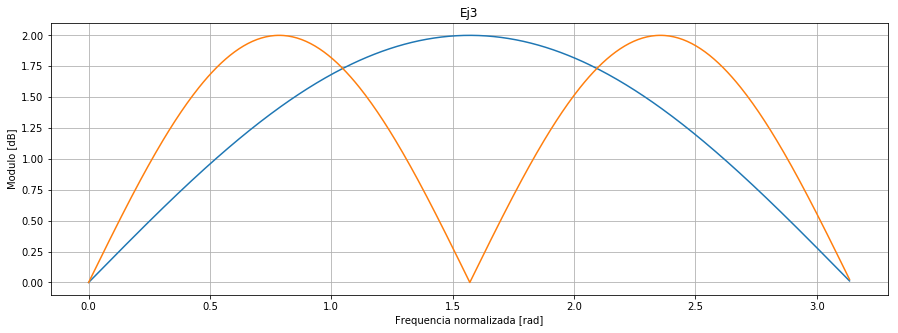

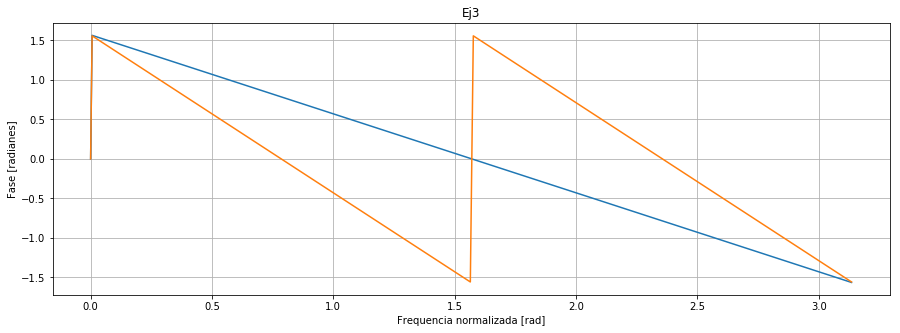

In [4]:
w1, h1 = sig.freqz(np.array([1, 0, -1]), 1)
w2, h2 = sig.freqz(np.array([1, 0, 0, 0, -1]), 1)

plt.figure(figsize=(15,5))
plt.plot(w1, abs(h1), label='N=2')
plt.plot(w2, abs(h2), label='N=4')
plt.title('Ej3')
plt.xlabel('Frequencia normalizada [rad]')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(w1, np.angle(h1), label='N=2')
plt.plot(w2, np.angle(h2), label='N=4')
plt.title('Ej3')
plt.xlabel('Frequencia normalizada [rad]')
plt.ylabel('Fase [radianes]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
plt.show()

<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [17]:
# Defina la plantilla del filtro

fs0 = 0.1 # fin de la banda de detenida 0
fc0 = 1 # comienzo de la banda de paso
fc1 = 40 # fin de la banda de paso
fs1 = 45# comienzo de la banda de detenida 1


b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Principalmente del siguiente punto (punto 5) donde calculamos la línea de base y se la restamos al ecg. Comparando el espectro de la señal original con el de la señal restada la línea de base se ve que hay q sacar una componente grande en baja frecuencia alrededor de 0.1Hz. En alta frecuencia la interferencia que observo es un pequeño pico en 50 y que la señal ya tiene poca energía cerca de 35Hz.
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

(-100, 10)

d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


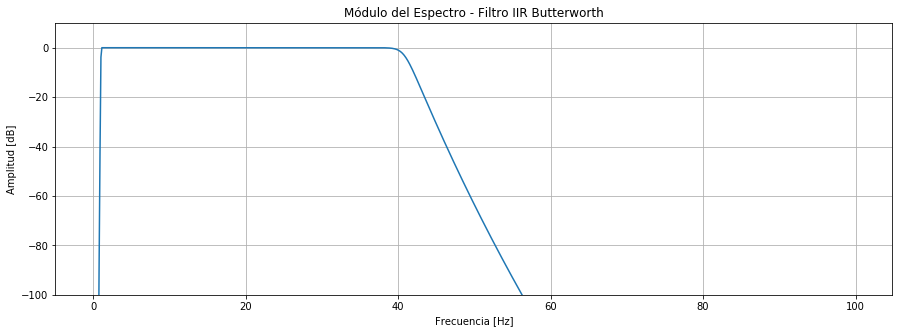

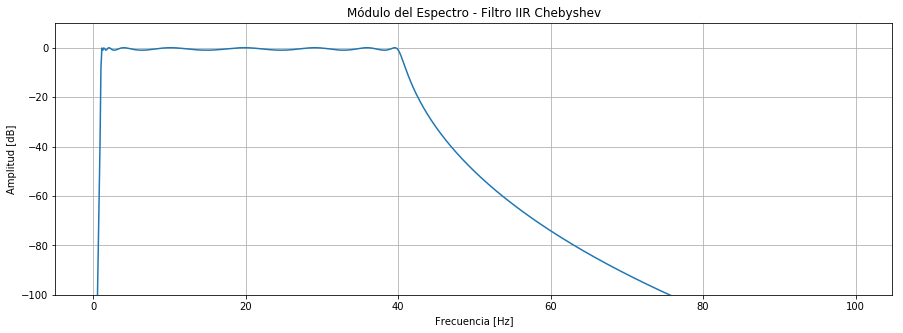

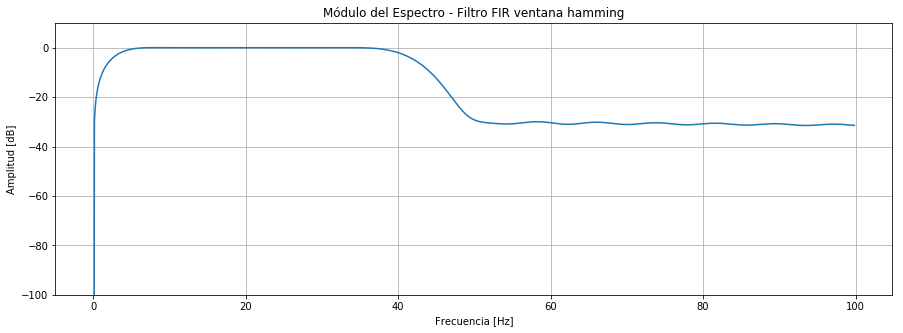

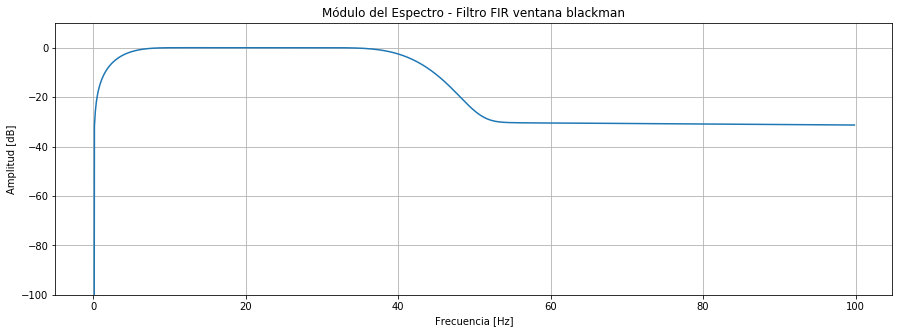

In [19]:
fs = 1000
fny = fs/2
Ts = 1/fs
rad2f = fny/np.pi

fs0 = 0.1 # fin de la banda de detenida 0
fc0 = 1 # comienzo de la banda de paso
fc1 = 40 # fin de la banda de paso
fs1 = 45# comienzo de la banda de detenida 1
paso = np.array([fc0,fc1]) / fny
stop = np.array([fs0,fs1]) / fny
puntos = 4096
fac = puntos/2

############  Filtro IIR  Butterworth ####################
sosB = sig.iirdesign(paso,stop,1,30,ftype='butter',output='sos')
w1,h1 = sig.sosfreqz(sosB,puntos)
h1[0] = h1[4095]
myf.PrintModule(w1*rad2f,h1*fac,0,puntos/5,15,5,'Filtro IIR Butterworth','plot','log')
plt.ylim(-100,10)

############  Filtro IIR  Chebyshev ####################
sosCh = sig.iirdesign(paso,stop,1,30,ftype='cheby1',output='sos')
w2,h2 = sig.sosfreqz(sosCh,puntos)
h2[0] = h2[4095]
myf.PrintModule(w2*rad2f,h2*fac,0,puntos/5,15,5,'Filtro IIR Chebyshev','plot','log')
plt.ylim(-100,10)

################   FIR   ##############################
freq = np.array([0,fs0,fc0,fc1,fs1,fny])/fny
gain = np.array([0,0.031,1,1,0.031,0])
numtaps = 256
############## FIR ventana hamming ######################
FIRcoefHam = sig.firwin2(numtaps+1, freq, gain, window='hamming', antisymmetric=True)
w3,h3 = sig.freqz(FIRcoefHam,worN=puntos)
myf.PrintModule(w3*rad2f,h3*fac,0,puntos/5,15,5,'Filtro FIR ventana hamming','plot','log')
plt.ylim(-100,10)
############## FIR ventana blackman ######################
FIRcoefBlk = sig.firwin2(numtaps+1, freq, gain, window='blackman', antisymmetric=True)
w4,h4 = sig.freqz(FIRcoefBlk,worN=puntos)
myf.PrintModule(w4*rad2f,h4*fac,0,puntos/5,15,5,'Filtro FIR ventana blackman','plot','log')
plt.ylim(-100,10)

d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



d:\program files\python37\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


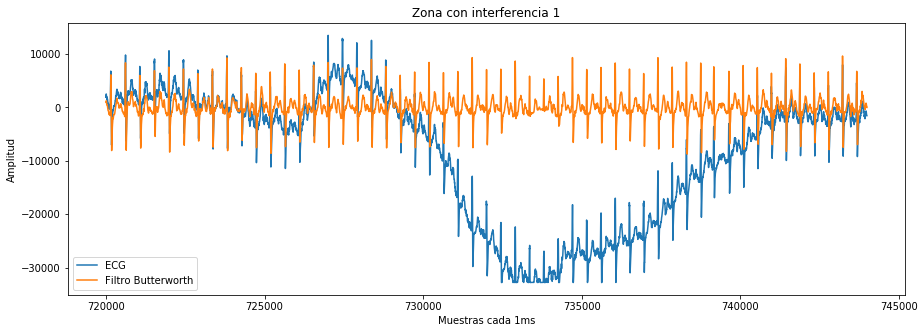

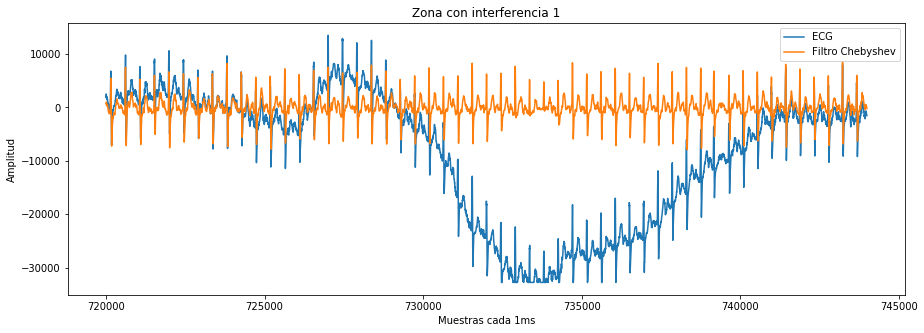

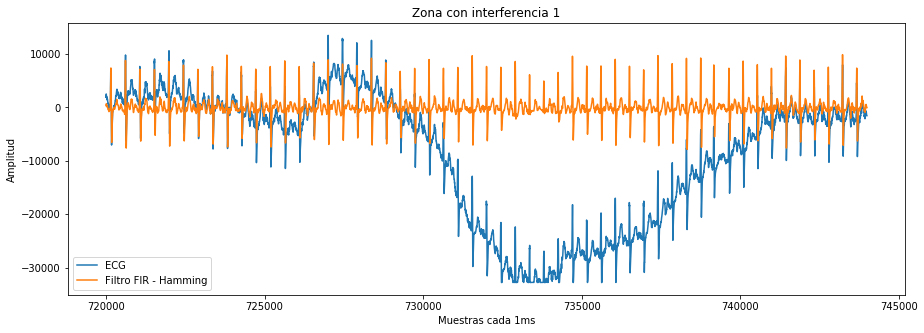

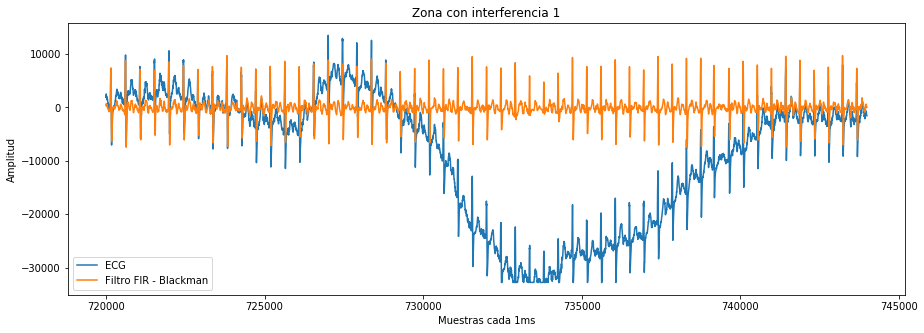

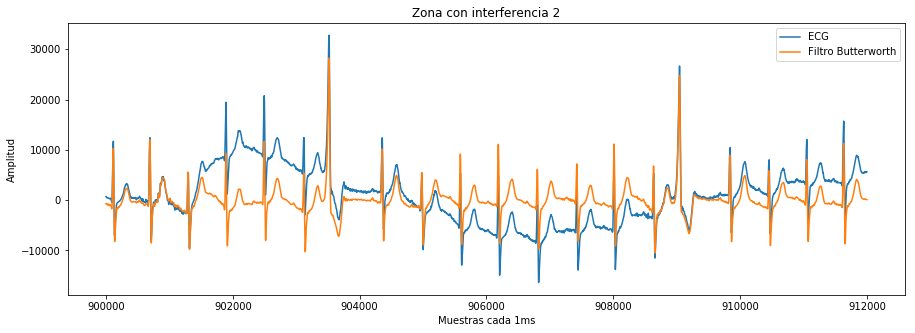

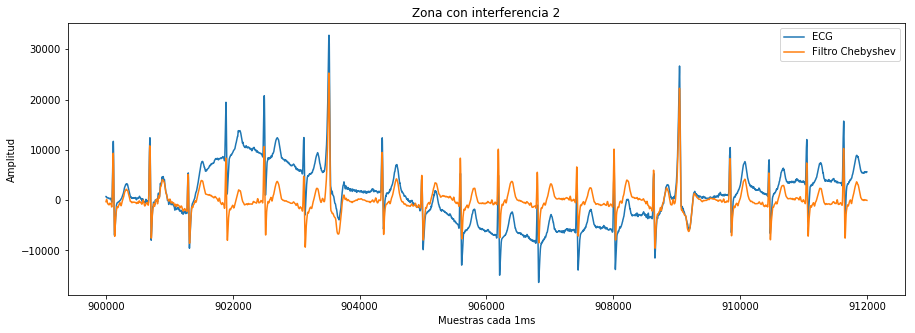

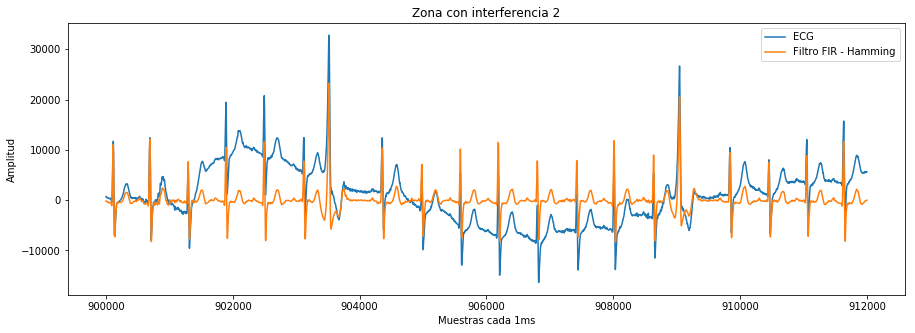

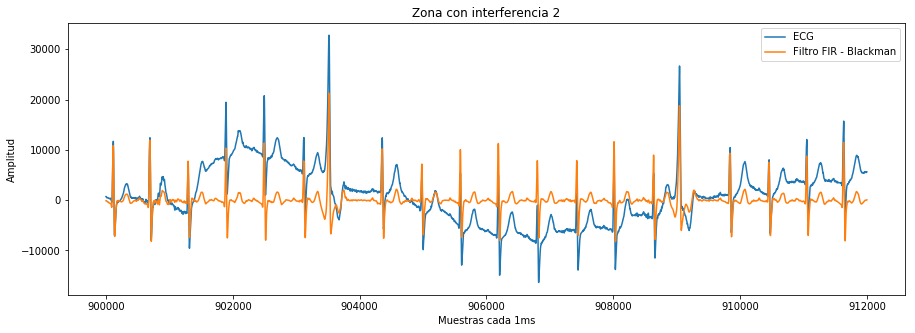

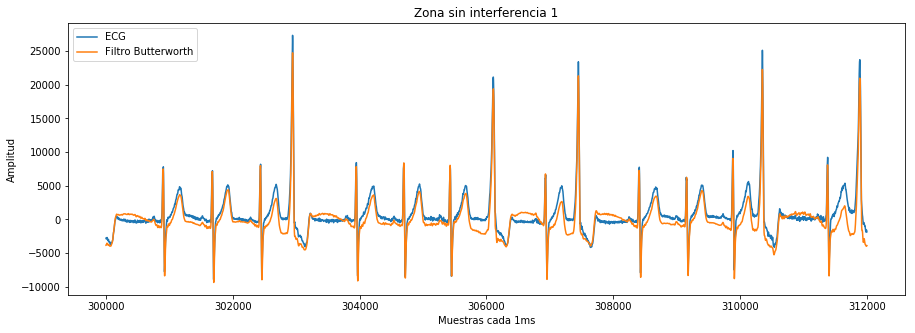

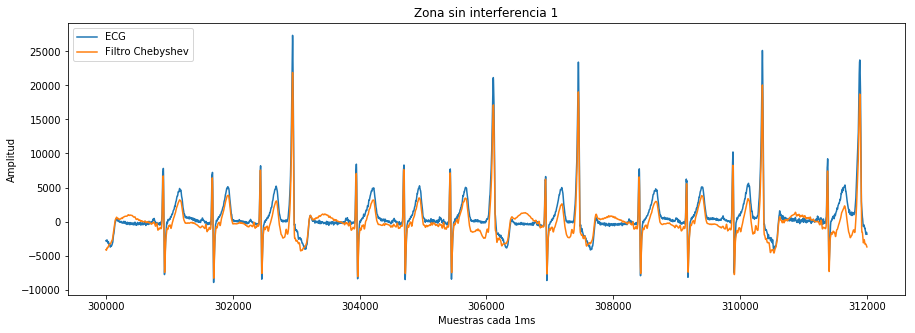

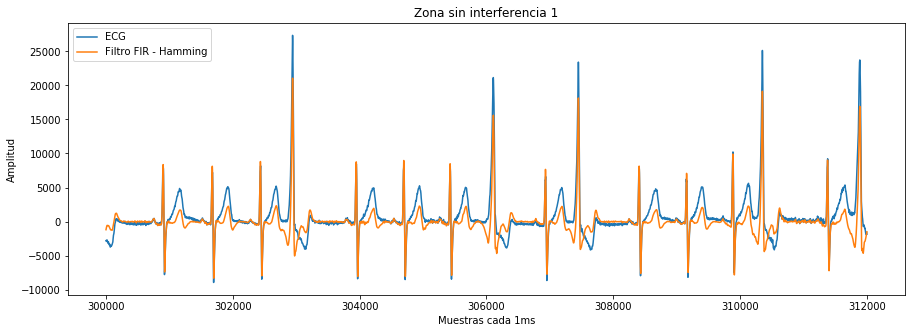

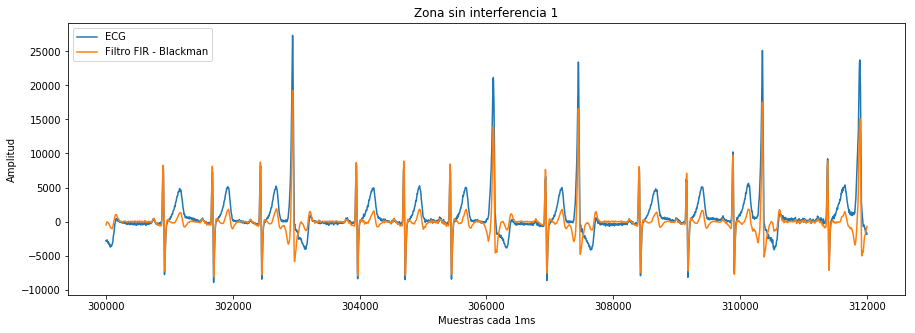

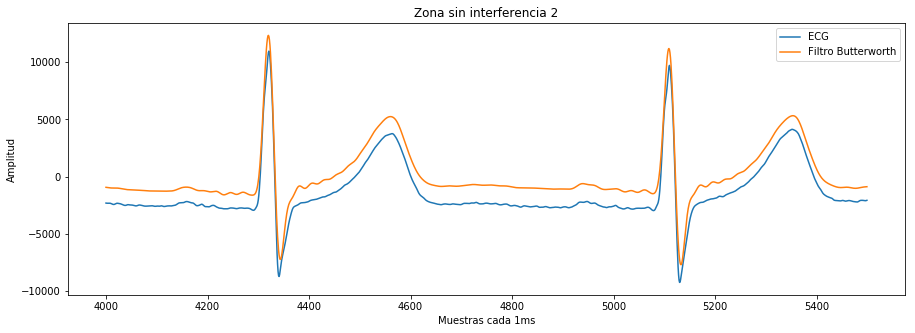

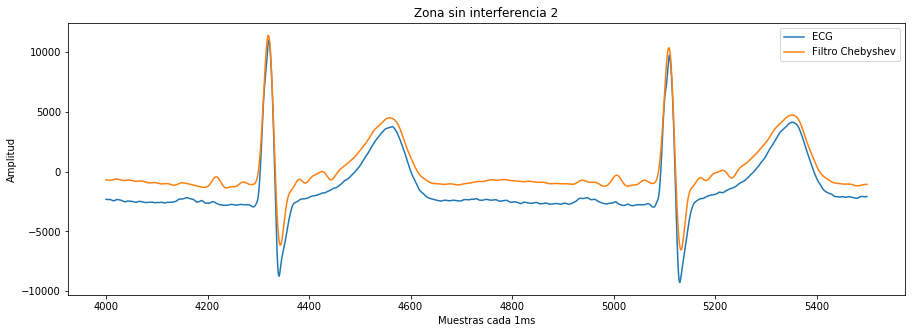

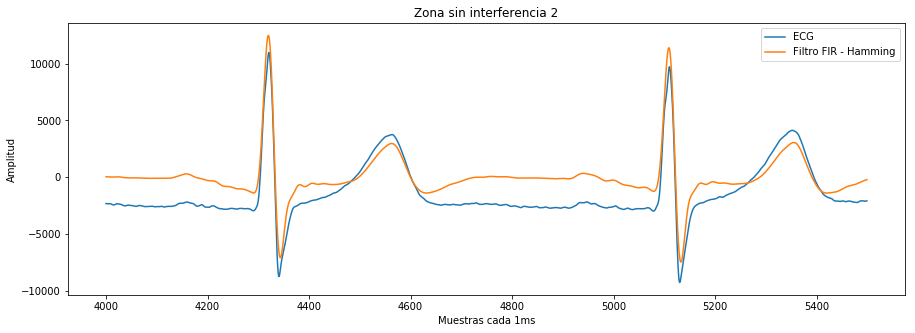

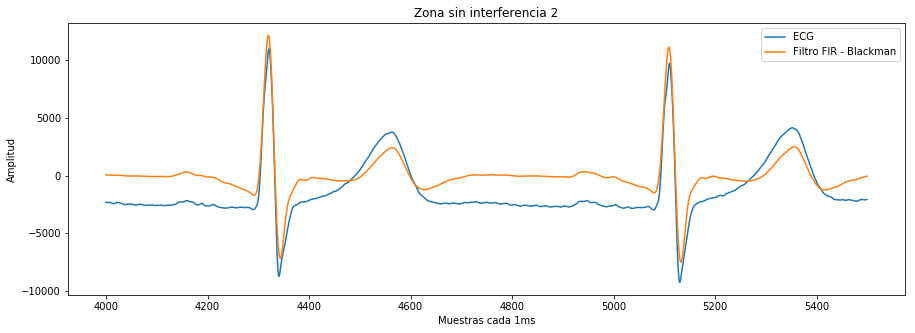

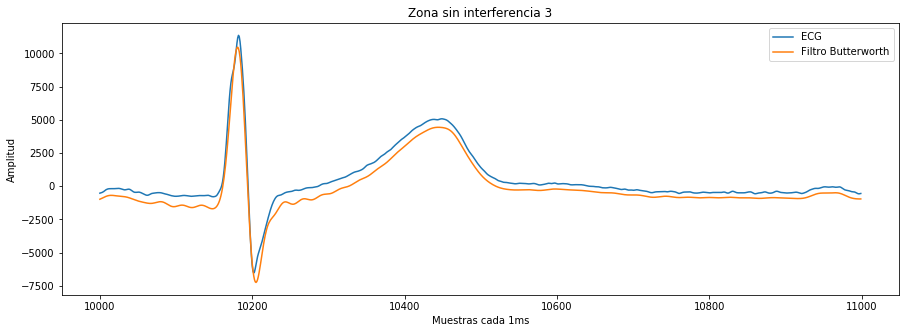

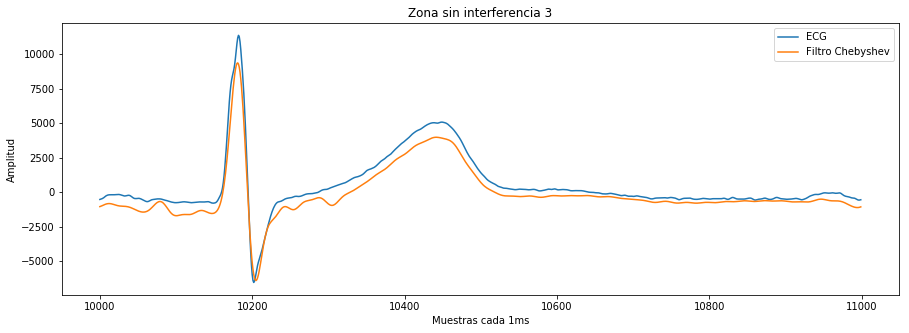

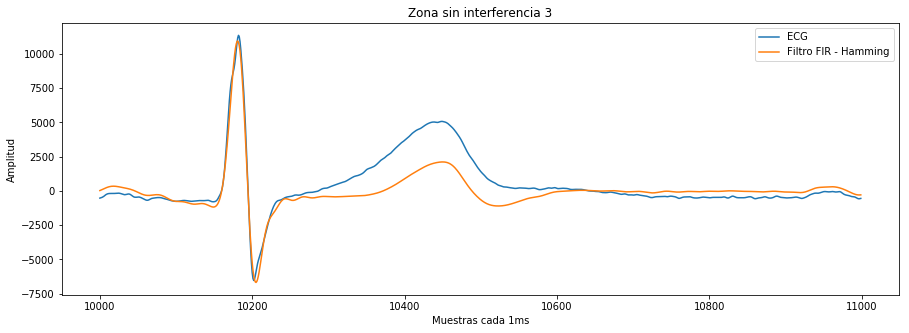

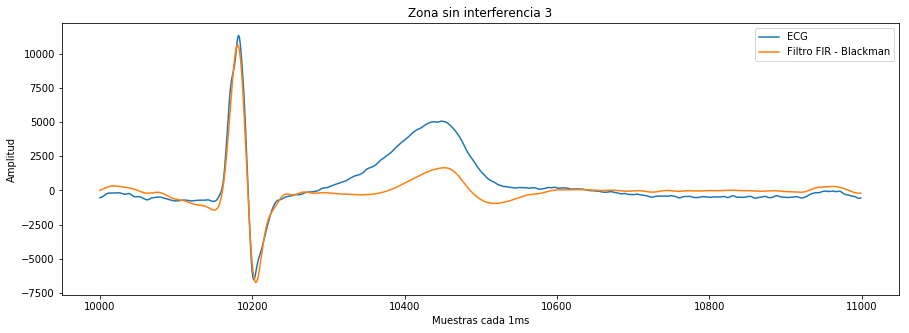

In [20]:
mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg = mat_struct['ecg_lead']
N = len(ecg)

# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12*60*fs, 12.4*60*fs], dtype=int) , # minutos a muestras
        np.array([15*60*fs, 15.2*60*fs], dtype=int) , # minutos a muestras
        )
ZcI = np.array([[int(12*60*fs),int(12.4*60*fs)],[int(15*60*fs),int(15.2*60*fs)]],dtype=int)
#ZcI = np.array([[int(730000),int(735000)],[int(15*60*fs),int(15.2*60*fs)]],dtype=int)

zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )
ZsI = np.array([[int(5*60*fs),int(5.2*60*fs)],[4000,5500],[10e3,11e3]],dtype =int)

###################  Filtrado  #######################
### Butterworth
outB = sig.sosfiltfilt(sosB, ecg, axis=0)
### Chebyshev
outCh = sig.sosfiltfilt(sosCh, ecg, axis=0)
### FIR ventana hamming
den = np.zeros(len(FIRcoefHam))
den[0] = 1
outHam = sig.filtfilt(FIRcoefHam, den, ecg, axis=0)
### FIR ventana blackman
den = np.zeros(len(FIRcoefBlk))
den[0] = 1
outBlk = sig.filtfilt(FIRcoefBlk, den, ecg, axis=0)

###############  Zona con interferencia 1 ###########################
M1 = np.arange(ZcI[0,0],ZcI[0,1],1)
########  Filtro IIR  Butterworth ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[0,0]:ZcI[0,1]], label='ECG')
plt.plot( M1, outB[ZcI[0,0]:ZcI[0,1]], label='Filtro Butterworth')
plt.title('Zona con interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro IIR  Chebyshev ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[0,0]:ZcI[0,1]], label='ECG')
plt.plot( M1, outCh[ZcI[0,0]:ZcI[0,1]], label='Filtro Chebyshev')
plt.title('Zona con interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Hamming ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[0,0]:ZcI[0,1]], label='ECG')
plt.plot( M1, outHam[ZcI[0,0]:ZcI[0,1]], label='Filtro FIR - Hamming')
plt.title('Zona con interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Blackman ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[0,0]:ZcI[0,1]], label='ECG')
plt.plot( M1, outBlk[ZcI[0,0]:ZcI[0,1]], label='Filtro FIR - Blackman')
plt.title('Zona con interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')

###############  Zona con interferencia 2 ###########################
M1 = np.arange(ZcI[1,0],ZcI[1,1],1)
########  Filtro IIR  Butterworth ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[1,0]:ZcI[1,1]], label='ECG')
plt.plot( M1, outB[ZcI[1,0]:ZcI[1,1]], label='Filtro Butterworth')
plt.title('Zona con interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro IIR  Chebyshev ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[1,0]:ZcI[1,1]], label='ECG')
plt.plot( M1, outCh[ZcI[1,0]:ZcI[1,1]], label='Filtro Chebyshev')
plt.title('Zona con interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Hamming ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[1,0]:ZcI[1,1]], label='ECG')
plt.plot( M1, outHam[ZcI[1,0]:ZcI[1,1]], label='Filtro FIR - Hamming')
plt.title('Zona con interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Blackman ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZcI[1,0]:ZcI[1,1]], label='ECG')
plt.plot( M1, outBlk[ZcI[1,0]:ZcI[1,1]], label='Filtro FIR - Blackman')
plt.title('Zona con interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')

###############  Zona sin interferencia 1 ###########################
M1 = np.arange(ZsI[0,0],ZsI[0,1],1)
########  Filtro IIR  Butterworth ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[0,0]:ZsI[0,1]], label='ECG')
plt.plot( M1, outB[ZsI[0,0]:ZsI[0,1]], label='Filtro Butterworth')
plt.title('Zona sin interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro IIR  Chebyshev ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[0,0]:ZsI[0,1]], label='ECG')
plt.plot( M1, outCh[ZsI[0,0]:ZsI[0,1]], label='Filtro Chebyshev')
plt.title('Zona sin interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Hamming ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[0,0]:ZsI[0,1]], label='ECG')
plt.plot( M1, outHam[ZsI[0,0]:ZsI[0,1]], label='Filtro FIR - Hamming')
plt.title('Zona sin interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Blackman ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[0,0]:ZsI[0,1]], label='ECG')
plt.plot( M1, outBlk[ZsI[0,0]:ZsI[0,1]], label='Filtro FIR - Blackman')
plt.title('Zona sin interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')

###############  Zona sin interferencia 2 ###########################
M1 = np.arange(ZsI[1,0],ZsI[1,1],1)
########  Filtro IIR  Butterworth ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[1,0]:ZsI[1,1]], label='ECG')
plt.plot( M1, outB[ZsI[1,0]:ZsI[1,1]], label='Filtro Butterworth')
plt.title('Zona sin interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro IIR  Chebyshev ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[1,0]:ZsI[1,1]], label='ECG')
plt.plot( M1, outCh[ZsI[1,0]:ZsI[1,1]], label='Filtro Chebyshev')
plt.title('Zona sin interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Hamming ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[1,0]:ZsI[1,1]], label='ECG')
plt.plot( M1, outHam[ZsI[1,0]:ZsI[1,1]], label='Filtro FIR - Hamming')
plt.title('Zona sin interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Blackman ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[1,0]:ZsI[1,1]], label='ECG')
plt.plot( M1, outBlk[ZsI[1,0]:ZsI[1,1]], label='Filtro FIR - Blackman')
plt.title('Zona sin interferencia 2')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')

###############  Zona sin interferencia 3 ###########################
M1 = np.arange(ZsI[2,0],ZsI[2,1],1)
########  Filtro IIR  Butterworth ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[2,0]:ZsI[2,1]], label='ECG')
plt.plot( M1, outB[ZsI[2,0]:ZsI[2,1]], label='Filtro Butterworth')
plt.title('Zona sin interferencia 3')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro IIR  Chebyshev ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[2,0]:ZsI[2,1]], label='ECG')
plt.plot( M1, outCh[ZsI[2,0]:ZsI[2,1]], label='Filtro Chebyshev')
plt.title('Zona sin interferencia 3')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Hamming ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[2,0]:ZsI[2,1]], label='ECG')
plt.plot( M1, outHam[ZsI[2,0]:ZsI[2,1]], label='Filtro FIR - Hamming')
plt.title('Zona sin interferencia 3')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')
########  Filtro FIR ventana Blackman ##########
plt.figure(figsize=(15,5))
plt.plot( M1, ecg[ZsI[2,0]:ZsI[2,1]], label='ECG')
plt.plot( M1, outBlk[ZsI[2,0]:ZsI[2,1]], label='Filtro FIR - Blackman')
plt.title('Zona sin interferencia 3')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.legend(loc='best')

<div class="alert alert-block alert-warning">
<p><b>Respuesta:</b> Inicialmente se realizo el filtrado normal con ambos tipos de filtos, IIR y FIR, y se lograban buenos resultados en la eliminación de la línea de base pero la morfología de la señal se veia afectada especialmente con los IIR. Esto se debe a que en los IIR al tener fase no lineal el retardo de grupo no es constante, entonces las distintas componentes de frecuencia son afectadas de distinta manera. Mientas que los FIR conservan mucho mejor la morfología de la señal y solo agregan un retardo a la señal que era de esperarse debido a su retardo de grupo constante.</p>
<p>Luego se aplicó un filtrado bidireccional en cual se aplica el filtro 2 veces pero se invierte la fase la segunda vez. El resultado es la anulación de la fase agregada por el filtro y esto es lo que se ve en los gráficos anteriores. De esta manera se logra mitigar la linea de base y se conserva de mejor manera la morfología. En las zonas con sin interferencia se conserva de buena manera la forma, pero en zonas con interferencia toda conseerva ruido de alta frecuencia, por lo que habría que ajustar los filtros o aplicar otra técnica.</p>
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


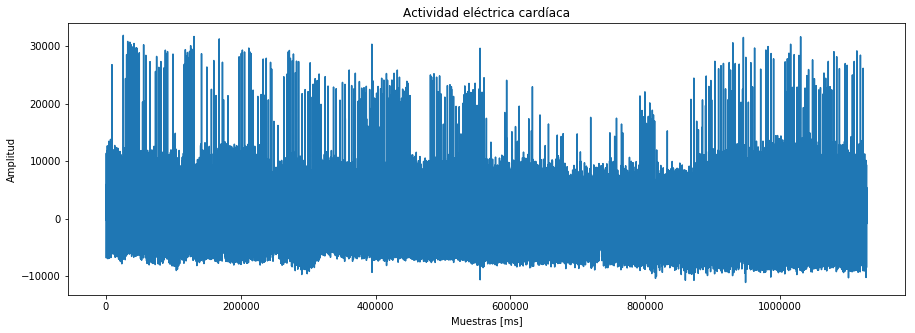

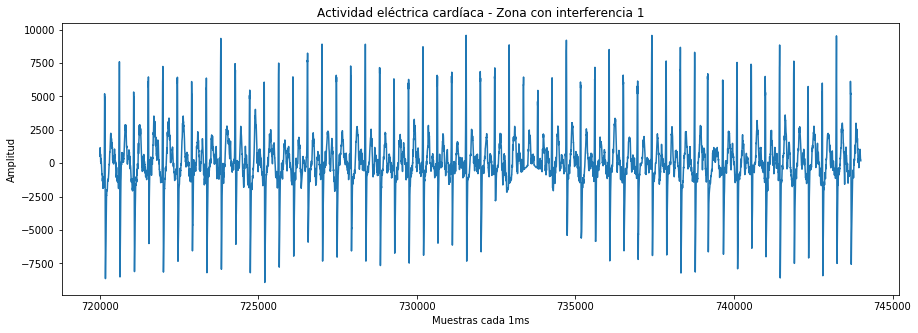

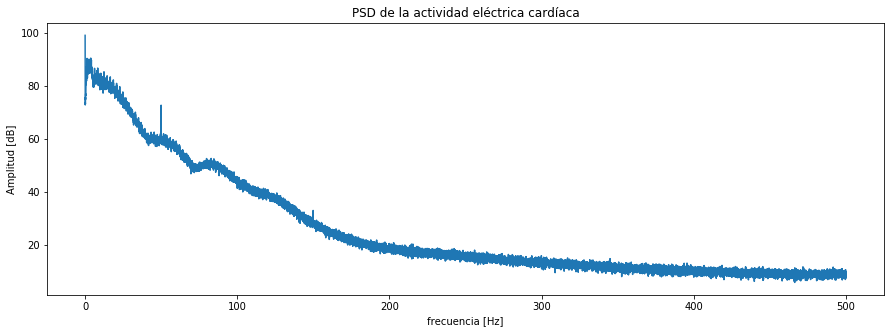

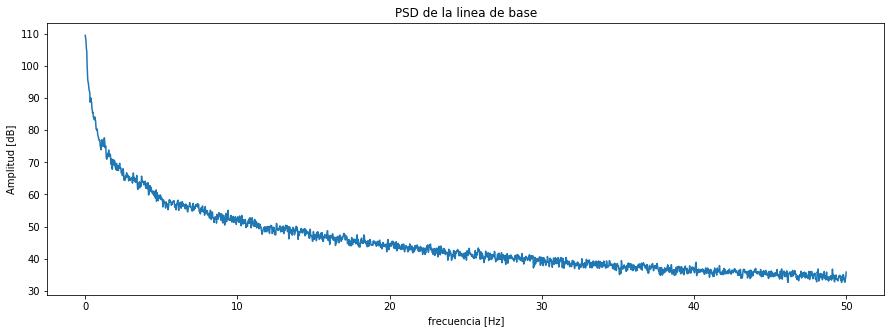

In [8]:
B = sig.medfilt(ecg.flatten(),201)
B = sig.medfilt(B.flatten(),601)
S_B = ecg - B.reshape(N,1)

plt.figure(figsize=(15,5))
plt.title('Actividad eléctrica cardíaca')
plt.xlabel('Muestras [ms]')
plt.ylabel('Amplitud')
plt.plot(S_B)

plt.figure(figsize=(15,5))
plt.title('Actividad eléctrica cardíaca - Zona con interferencia 1')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
#Z1 = np.array([445000,465000])
Z1 = np.array([int(12*60*fs),int(12.4*60*fs)])
M1 = np.arange(Z1[0],Z1[1],1)
plt.plot(M1, S_B[Z1[0]:Z1[1]])
#####################################################
fs = 1000
Ts = 1/fs
L = 50000
D = int(L/2)
rep = 1
R = int(D * np.floor(N/D))

PSDp = myf.Welch(S_B[0:R],L,rep)
freq = np.fft.fftfreq(L,Ts)
plt.figure(figsize=(15,5))
plt.title('PSD de la actividad eléctrica cardíaca')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
#plt.xlim([0,50])
#plt.ylim([0,1.4])
PSDp = 10*np.log10(PSDp)
#plt.plot(freq[0:5000],PSDp[0:5000])
plt.plot(freq[0:D],PSDp[0:D])

############ PSD de la linea de base ##################
PSDp = myf.Welch(B[0:R],L,rep)
freq = np.fft.fftfreq(L,Ts)
plt.figure(figsize=(15,5))
plt.title('PSD de la linea de base')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
#plt.xlim([0,50])
#plt.ylim([0,1.4])
PSDp = 10*np.log10(PSDp)
#plt.plot(freq[0:5000],PSDp[0:5000])
ran = int(D/10)
plt.plot(freq[0:ran],PSDp[0:ran])

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con los filtros de mediana vemos que se logra estimar muy bien la línea de base. Con respecto a los filtros anteriores se obitene también una señal sin interferecia de la línea de base pero en este caso no se filtra el ruido de alta frecuencia.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


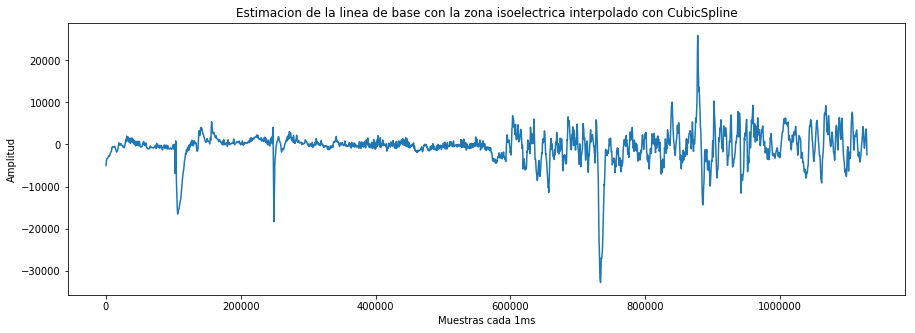

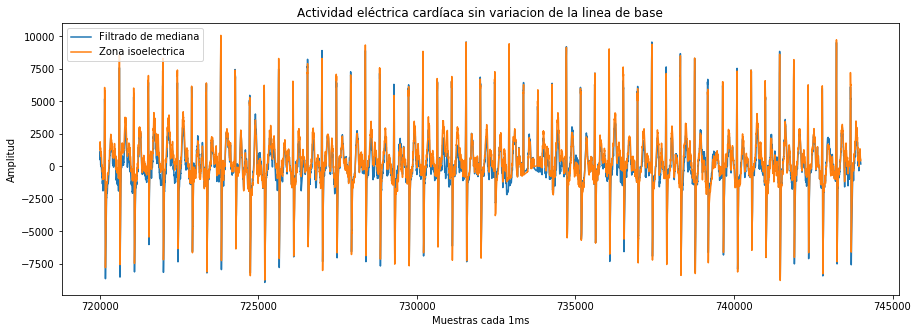

In [9]:
from scipy.interpolate import CubicSpline as CS

qrs = mat_struct['qrs_detections']
DT = 90 #Muestras hacia atras desde cada qrs hasta zona isoelectrica
##########################################
iso = (qrs - DT).reshape(len(qrs))
Be = ecg[iso].reshape(len(iso)) #Be: estimacion de la linea de base con la zona isoelectrica
csp = CS(iso,Be)
k = np.linspace(0, N-1, N)
Bi = csp(k) #Bi: Be interpolado con CubicSpline para llevar a grilla de ecg
plt.figure(figsize=(15,5))
plt.plot(Bi)
plt.title('Estimacion de la linea de base con la zona isoelectrica interpolado con CubicSpline')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')

S_Bi = ecg - Bi.reshape(N,1)
Z1 = np.array([int(12*60*fs),int(12.4*60*fs)])
M1 = np.arange(Z1[0],Z1[1],1)
plt.figure(figsize=(15,5))
plt.title('Actividad eléctrica cardíaca sin variacion de la linea de base')
plt.xlabel('Muestras cada 1ms')
plt.ylabel('Amplitud')
plt.plot(M1, S_B[Z1[0]:Z1[1]], label='Filtrado de mediana')
plt.plot(M1, S_Bi[Z1[0]:Z1[1]], label='Zona isoelectrica')
plt.legend(loc='best')

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mediante otro metodo para estimar la linea de base se obtuvo buenos resultados comparandolo contra el metodo de filtrado de mediana. En este caso se tomaron los valores del ecg en la zona isoeléctrica donde se supone no hay actividad eléctrica, por lo cual se toma el valor de la línea de base. Para esto se tomo los valores un algunas muestras antes de la detección de cada latido. Se observó un latido normal para tener una idea de cuantas muestras antes habria que muestrear y luego se probaron varios valores hasta alcanzar el mejor resultado.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


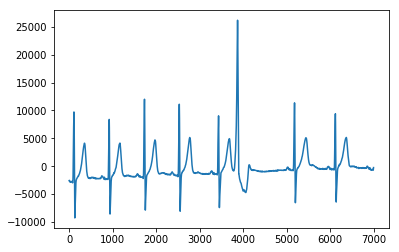

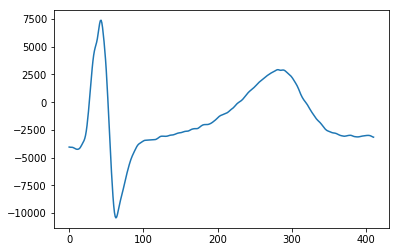

In [10]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


d:\program files\python37\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


Cantidad de detecciones estimadas 1897
Cantidad de detecciones en base a la posicion 2355
Cantidad de detecciones reales 1903
Maximo largo de una deteccion 153
Posicion de la deteccion mas larga 395028


d:\program files\python37\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


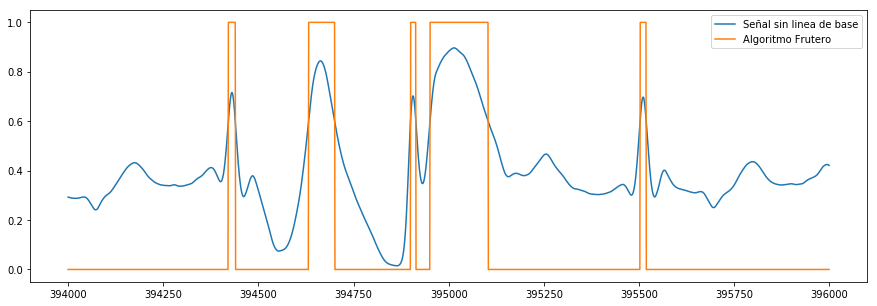

In [69]:
from scipy.signal import correlate

###### Comparacion ######
pru = S_B[5000:12000]
#d = correlate(pru,hb_1)
d = correlate(S_B,hb_1)
#d = correlate(outB,hb_1)

###### Normalizo ######
min = d[np.argmin(d)]
d -= min
max = d[np.argmax(d)]
d /= max
d = d*d

##### Deteccion #####
THR = 0.6 #Threshold
det = []
for i in range(len(d)):
    if d[i] < THR:
        det.append(0)
    else:
        det.append(1)
        
'''plt.figure(figsize=(15,5))
plt.plot(d,label='Señal sin linea de base')
plt.plot(det,label='Detecciones')
plt.legend(loc='best')
'''
##### Posicion y cuenta #####
tm  = 300
aux = tm
LCount = 0
detCount = 0
detLen = []
detPos = []
for i in range(len(det)):
    if aux < tm:
        aux += 1
        flag = 1
    if det[i] == 1:
        LCount +=1
        if aux == tm:
            detCount += 1
            aux = 0
    else:
        if LCount != 0 and flag == 1:
            detLen.append(LCount)
            detPos.append(round(i-LCount/2))
            LCount = 0
            flag = 0

print('Cantidad de detecciones estimadas '+str(detCount))
print('Cantidad de detecciones en base a la posicion '+str(len(detPos)))
qrs = vertical_flaten(mat_struct['qrs_detections'])
print('Cantidad de detecciones reales '+str(len(qrs)))
print('Maximo largo de una deteccion '+str(np.max(detLen)))
print('Posicion de la deteccion mas larga '+str(detPos[np.argmax(detLen)]))

Z1 = np.array([int(394000),int(396000)])
#Z1 = np.array([int(12*60*fs),int(12.05*60*fs)],dtype=int)
M1 = np.arange(Z1[0],Z1[1],1)
plt.figure(figsize=(15,5))
plt.plot(M1, d[Z1[0]:Z1[1]], label='Señal sin linea de base')
plt.plot(M1, det[Z1[0]:Z1[1]], label='Algoritmo Frutero')
plt.legend(loc='best')

In [ ]:
min = np.argmin(d)
print(d[min])

In [56]:
a = []
a.append(0)
a.append(10)
a.append(100)
a[1] += 1
print(a[1])

11
